In [2]:
import math
import numpy as np
import time as t
import matplotlib.pyplot as plt

In [3]:
def obj_fun(x:np.mat):
    n = len(x)
    r = np.zeros(x.shape)
    for i in range(n):
        t = 0.1*(i+1)
        y = math.exp(-t)-5*math.exp(-10*t)+3*math.exp(-4*t)
        r[i] = x[2]*math.exp(-t*x[0])-x[3]*math.exp(-t*x[1])+x[5]*math.exp(-t*x[4])-y
    obj_val = float(sum(np.power(r,2)))
    
    return obj_val

In [4]:
def grad_fun(x:np.mat):
    g1 = 0
    g2 = 0
    g3 = 0
    g4 = 0
    g5 = 0
    g6 = 0
    for i in range(len(x)):
        t = 0.1*(i+1)
        y = math.exp(-t)-5*math.exp(-10*t)+3*math.exp(-4*t)
        r = 2*(x[2]*math.exp(-t*x[0])-x[3]*math.exp(-t*x[1])+x[5]*math.exp(-t*x[4])-y)
        d1 = -t*x[2]*math.exp(-t*x[0])
        d2 = t*x[3]*math.exp(-t*x[1])
        d3 = math.exp(-t*x[0])
        d4 = -math.exp(-t*x[1])
        d5 = -x[5]*t*math.exp(-t*x[4])
        d6 = math.exp(-t*x[4])
        g1 += r*d1
        g2 += r*d2
        g3 += r*d3
        g4 += r*d4
        g5 += r*d5
        g6 += r*d6
    
    g=np.mat(np.array([g1,g2,g3,g4,g5,g6])).T
    
    return g

In [4]:
##
def trad_gradient(init_x,obj_f,grad_f):#传统的梯度下降法
    time1 = t.time()
    alpha = 0.15
    max_iter = 100000
    eps = 1e-8
    curr_x = init_x
    curr_f = obj_f(curr_x)
    obj_val = [curr_f]
    for i in range(max_iter):
        curr_grad = grad_f(curr_x)
        desc_dir = -1*curr_grad
        now_x = curr_x
        now_f = obj_fun(now_x)
        curr_x = curr_x + alpha*desc_dir
        curr_f = obj_fun(curr_x)
        obj_val.append(curr_f)
        if np.abs(curr_f-now_f) <= eps:
                break
    time2 = t.time()
    time11 = time2 - time1
    print('传统梯度下降法最优解',curr_x,"函数值",curr_f,"迭代次数",i,"迭代时间",time11)
    
    return obj_val

#alpha = 0.1,函数值为：0.0002906060174628848, '迭代次数': 63547
#alpha = 0.2,'函数值': 0.0002864839430117859, '迭代次数': 63653
#alpha = 0.15，'函数值': 0.00020983768305172604, '迭代次数': 48128

In [8]:
def RMSprop(init_x):#其他的梯度下降法: 𝑘(𝑖) = 𝛾*𝑔𝑘−1(𝑖) + (1 − 𝛾) (𝑔𝑘(𝑖))2
    time1 = t.time()
    alph = 1
    max_iter = 1000000
    eps = 1e-8
    curr_grad = grad_fun(init_x)
    tol_grad = np.power(curr_grad,2)
    curr_x = init_x
    curr_f = obj_fun(curr_x)
    obj_val = [curr_f]
    for i in range(1,max_iter):
        now_grad = curr_grad
        alph0 = alph/(np.sqrt(0.9 * tol_grad/i+ 0.1 * np.power(curr_grad,2)+ eps))
        curr_desc = np.multiply(alph0,curr_grad)
        now_x = curr_x
        now_f = obj_fun(now_x)
        curr_x = curr_x - curr_desc
        curr_f = obj_fun(curr_x)
        obj_val.append(curr_f)
        curr_grad = grad_fun(curr_x)
        tol_grad += np.power(curr_grad,2)
        if np.abs(curr_f-now_f) <= eps:
                break
    time2 = t.time()
    time33 = time2 - time1
            
    print("RMSprop梯度下降法最优解",curr_x,"函数值",curr_f,"迭代次数",i,"迭代时间",time33)
    
    return obj_val

In [17]:
##
def adam(init_x,beta1=0.9,beta2=0.999,alpha=0.15,epi=1e-8):
    max_iter = 1000000
    curr_x = init_x 
    curr_f = obj_fun(curr_x)
    obj_val = [curr_f]
    curr_grad = grad_fun(curr_x)
    sum_grad1 = np.mat([[0.],[0.],[0.],[0.],[0.],[0.]])
    sum_grad2 = 0
    for i in range(1,max_iter):
        sum_grad1 = beta1*sum_grad1 + (1-beta1)*curr_grad
        sum_grad2 = beta2*sum_grad2 + (1-beta2)*np.sum(np.power(curr_grad,2))
        iter_sum_grad1 = sum_grad1/(1-np.power(beta1,i))
        iter_sum_grad2 = sum_grad2/(1-np.power(beta2,i))
        now_x = curr_x
        now_f = obj_fun(curr_x) 
        curr_x = curr_x - alpha*iter_sum_grad1/(np.sqrt(iter_sum_grad2)+epi)
        curr_f = obj_fun(curr_x)
        obj_val.append(curr_f)
        curr_grad = grad_fun(curr_x)
        if np.abs(curr_f-now_f) <= 1e-10:
                break
    
    print("Adam梯度下降法最优解",curr_x,"函数值",curr_f,"迭代次数",i)
    return obj_val
    

In [4]:
def AdaGrad(init_x):
    alph = 1
    max_iter = 1000000
    eps = 1e-10
    curr_grad = grad_fun(init_x)
    tol_grad = curr_grad
    curr_x = init_x
    curr_f = obj_fun(curr_x)
    obj_val = [curr_f]
    for i in range(1,max_iter):
        now_grad = curr_grad
        alph0 = alph/(np.sqrt(tol_grad + eps))
        curr_desc = np.multiply(alph0,curr_grad)
        now_x = curr_x
        now_f = obj_fun(now_x)
        curr_x = curr_x - curr_desc
        curr_f = obj_fun(curr_x)
        obj_val.append(curr_f)
        curr_grad = grad_fun(curr_x)
        tol_grad += curr_grad
        if np.abs(curr_f-now_f) <= eps:
                break
    time2 = t.time()
    time33 = time2 - time1
            
    print("AdaGrad梯度下降法最优解",curr_x,"函数值",curr_f,"迭代次数",i,"迭代时间",time33)
    
    return obj_val   

In [13]:
def adadelta(init_x,gamma=0.9,epi=1e-8):
    max_iter = 1000000
    curr_x = init_x
    E_alpha = 0.5
    tol_grad = np.mat([[0.],[0.],[0.],[0.],[0.],[0.]])
    curr_f = obj_fun(curr_x)
    obj_val = [curr_f]
    for i in range(1,max_iter):
        curr_grad = grad_fun(curr_x)
        E_g = gamma*tol_grad/i + (1-gamma)*np.power(curr_grad,2)
        RMS_g = np.sqrt(E_g+epi)
        delta_theta = np.sqrt(E_alpha)/RMS_g
        now_x= curr_x
        now_f = obj_fun(curr_x) 
        curr_x = curr_x - delta_theta
        curr_f = obj_fun(curr_x)
        tol_grad += np.power(curr_grad,2)
        E_alpha += delta_theta
        obj_val.append(curr_f)
        if np.abs(curr_f-now_f) <= epi:
                break
    
    print("adadelta梯度下降法最优解",curr_x,"函数值",curr_f,"迭代次数",i)
    return obj_val

In [14]:
x_init = np.mat([1,2,1,1,1,1]).T

In [6]:
print(trad_gradient(x_init,obj_fun,grad_fun))

传统梯度下降法最优解 [[ 2.15393439]
 [11.16430072]
 [ 1.46420323]
 [ 3.91763157]
 [ 2.15393439]
 [ 1.46420323]] 函数值 0.00020983768305172604 迭代次数 48128 迭代时间 66.92870879173279
[0.5986966142557127, 1.343774114489772, 3.623394692281073, 7.867471961187104, 17.750797974913333, 12.803168606348196, 8.66193863785287, 1.691128914692774, 0.8694637007503891, 0.6949974708657393, 0.6386751365949761, 0.5980252240146502, 0.5610672935103782, 0.5260101982818124, 0.4926389718166383, 0.46100634219101294, 0.4311818967537638, 0.403229983220922, 0.3771890045598389, 0.35307570930708865, 0.33088114937586194, 0.31057434448173427, 0.29210277671985674, 0.2753961062436144, 0.2603686094027544, 0.24692296949965564, 0.23495330716142113, 0.22434862221850124, 0.21499557590014273, 0.20678120600308775, 0.19959502043758712, 0.19333082509189828, 0.1878880069567673, 0.18317252138834403, 0.17909745160232646, 0.17558332797146864, 0.17255814885846957, 0.16995724528709677, 0.1677229634842474, 0.16580427025416664, 0.16415626626419688, 0.16

In [ ]:
#优化速度非常慢
print(RMSprop(x_init))

In [18]:
print(adam(x_init))

Adam梯度下降法最优解 [[ 2.03964061]
 [12.43756603]
 [ 1.37287175]
 [ 4.03323684]
 [ 2.03964061]
 [ 1.37287175]] 函数值 3.646417492894944e-05 迭代次数 7545
[0.5986966142557127, 0.22969709889307433, 0.23236588470220018, 0.3532368478675159, 0.3600586473435843, 0.28343173109749276, 0.21165391648797258, 0.1936129470886858, 0.22393508031817907, 0.26121978665247947, 0.27047473816424866, 0.24860765503304105, 0.21552816344312814, 0.1939709453116319, 0.19455905567211515, 0.21082605343226363, 0.2262421852374481, 0.22817729523904737, 0.21646074546906977, 0.2007166307673939, 0.19161377681921354, 0.19336512043445508, 0.20184302960464803, 0.2088512665860611, 0.20877975883988614, 0.20222662127824936, 0.19444351880817032, 0.19076653199443636, 0.1927060702124389, 0.1973419838356987, 0.2001777801585316, 0.1988834397745078, 0.19477760410638525, 0.19119344540370997, 0.19053049190832871, 0.19249649956939038, 0.19475487993239116, 0.19513756281275427, 0.1933901444991602, 0.19107554049659964, 0.18999415990440652, 0.190636482

In [ ]:
print(adadelta(x_init))
#训练初中期，加速效果不错，很快训练后期，反复在局部最小值附近抖动

In [13]:
f1 = trad_gradient(x_init,obj_fun,grad_fun)
f2 = adam(x_init)

传统梯度下降法最优解 [[ 2.15393439]
 [11.16430072]
 [ 1.46420323]
 [ 3.91763157]
 [ 2.15393439]
 [ 1.46420323]] 函数值 0.00020983768305172604 迭代次数 48128 迭代时间 66.46570348739624
Adam梯度下降法最优解 [[1.06461835e+00]
 [1.42316580e+04]
 [6.34458213e-01]
 [1.42045931e+04]
 [1.06461835e+00]
 [6.34458213e-01]] 函数值 0.6443167284352144 迭代次数 99999


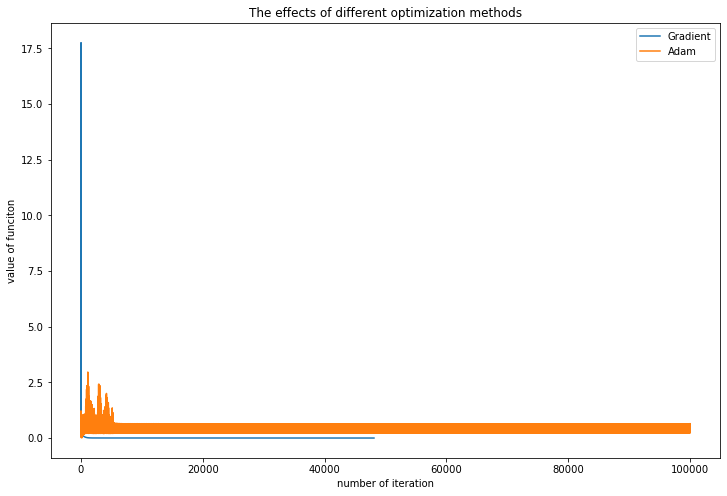

In [14]:
fig = plt.figure(figsize=(12,8))
plt.title('The effects of different optimization methods')
plt.plot(list(range(len(f1))),f1,label='Gradient')
plt.plot(list(range(len(f2))),f2,label='Adam')
# plt.plot(list(range(len(f3))),f3,label='Adadelta')
# plt.plot(list(range(len(f4))),f4,label='Adam')
plt.xlabel('number of iteration')
plt.ylabel('value of funciton')
plt.legend()
plt.show()